# Homework 6

For this homework, you'll be looking at the survey data gathered from the last exam. For each cell, answer the question either with code or text, as specified.

The data is here: https://drive.google.com/file/d/1-0d9sGptmBTbzf4jRGYDE8pWwxz0d-0z/view?usp=sharing

Copy this notebook, fill it out, and then submit it.


# Question 1

Write code to load in the data in a dataframe.

In [657]:
import pandas as pd

name = 'MidtermSurvey_Processed.csv'

df = pd.read_csv(name)

print(df.head())

   Unnamed: 0        Time  Hours_Studied Friend   Fair Lectures Assignments  \
0           0  4:45:00 PM            4.0     No    Yes      Yes         Yes   
1           1  4:45:14 PM            4.0    Yes  Kinda    Kinda       Kinda   
2           2  4:40:00 PM            4.0    Yes    Yes       No         Yes   
3           3  4:45:00 PM            7.0     No    Yes       No          No   
4           4  4:45:55 PM            2.0     No    Yes      Yes         Yes   

   Sleep   XP Class      Grade    Mystery  
0    7.0   No   Yes  66.509746  30.644589  
1    3.0   No   Yes  73.447272  37.825654  
2    8.0   No   Yes  61.562473  32.678616  
3    8.0   No   Yes  53.426324  30.805367  
4    6.0  Yes   Yes  79.710070  40.256162  


# Question 2

Create a column that measures, in minutes, how long each student took for their exam. Print the column at the end.

In [658]:
df['Time'] = pd.to_datetime(df['Time'])

start_time = pd.to_datetime('15:30:00')

df['duration_in_minutes'] = (df['Time'] - start_time).dt.total_seconds() / 60

print(df['duration_in_minutes'])

0      75.000000
1      75.233333
2      70.000000
3      75.000000
4      75.916667
         ...    
396          NaN
397          NaN
398          NaN
399          NaN
400          NaN
Name: duration_in_minutes, Length: 401, dtype: float64


/var/folders/w2/gjxl1sr96k56x0nj2_42f53m0000gp/T/ipykernel_2692/2251346674.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


# Question 3

Create a graph, comparing the distributions of the grades of students who thought the exam was fair, kind of fair, or not fair. (Note: If you create a graph that does not do a good job visuaizing this, you will loose points. For example, if you make a pie chart somehow, the graders will have no mercy).

Index(['Unnamed: 0', 'Time', 'Hours_Studied', 'Friend', 'Fair', 'Lectures',
       'Assignments', 'Sleep', 'XP', 'Class', 'Grade', 'Mystery',
       'duration_in_minutes'],
      dtype='object')


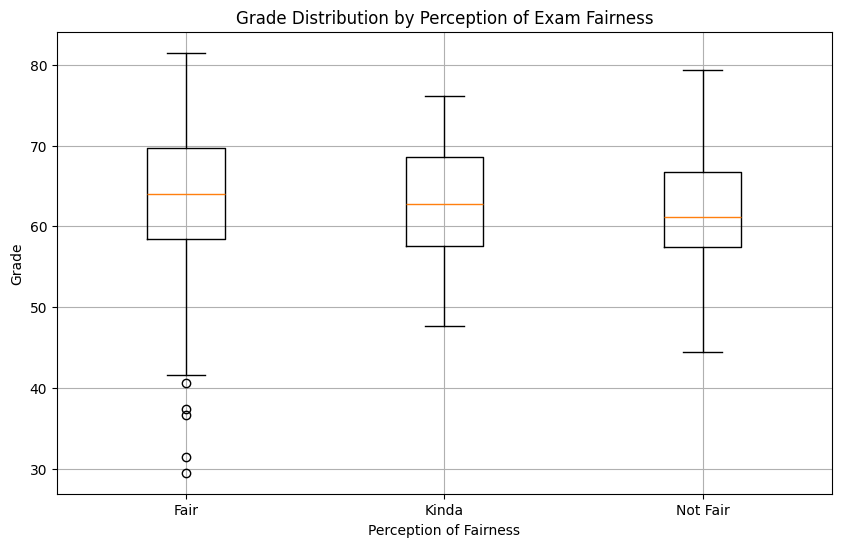

In [659]:
print(df.columns)
import matplotlib.pyplot as plt
fair_df = df[df['Fair'] == 'Yes']['Grade']
kinda_fair_df = df[df['Fair'] == 'Kinda']['Grade']
not_fair_df = df[df['Fair'] == 'No']['Grade']

# Data and labels
data = [fair_df, kinda_fair_df, not_fair_df]
labels = ['Fair', 'Kinda', 'Not Fair']

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels)

plt.title('Grade Distribution by Perception of Exam Fairness')
plt.xlabel('Perception of Fairness')
plt.ylabel('Grade')
plt.grid(True)
plt.show()


# Question 4

Do a hypothesis test to see if the distributions of student's grades for those of whom thought the exam was fair, kinda fair, or unfair have a stastically significant difference in mean. Print your p-value.

In [660]:
from scipy import stats

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(fair_df, kinda_fair_df, not_fair_df)

# Print the p-value
print("ANOVA test p-value:", p_value)
print("there is no stastically significant difference in mean")

ANOVA test p-value: 0.8389966340907092
there is no stastically significant difference in mean


# Question 5

Does studying more improve your score? Find out, and summarize the results below in text format. If it does not, speculate as to why.

In [661]:
import scipy.stats as stats

df_cleaned = df.dropna(subset=['Hours_Studied', 'Grade'])
correlation_coef, p_value = stats.pearsonr(df_cleaned['Hours_Studied'], df_cleaned['Grade'])
print(f"Pearson Correlation Coefficient: {correlation_coef}, P-value: {p_value}")


Pearson Correlation Coefficient: 0.06286069182995388, P-value: 0.32615834241685104


Since the pearson correlation coefficient is very low and positive suggests that there is a small positive corrilation between hours studied and grade. Also the p_value is more than 0.5% saying that the correlation isn't really significant.

# Question 6

Make another graph based on a question you think might be interesting.

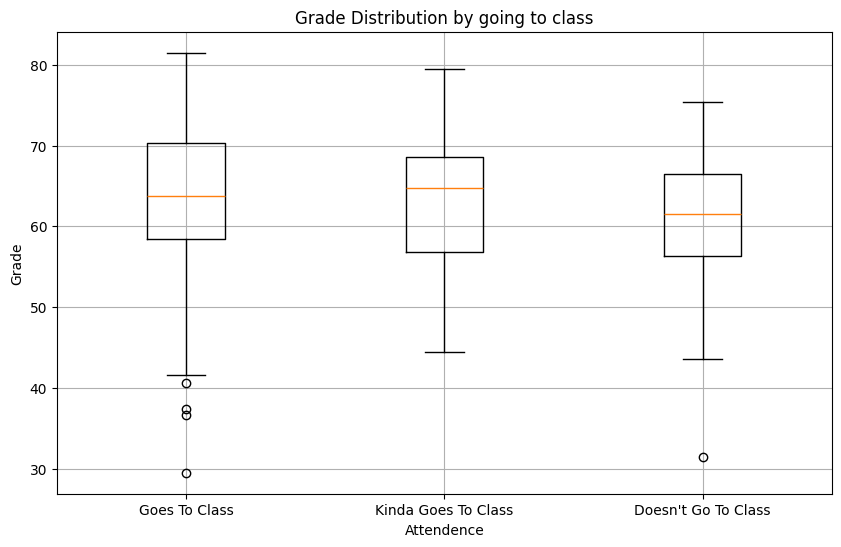

In [662]:
goes_df = df[df['Lectures'] == 'Yes']['Grade']
kinda_goes_df = df[df['Lectures'] == 'Kinda']['Grade']
not_going_df = df[df['Lectures'] == 'No']['Grade']

# Data and labels
data = [goes_df, kinda_goes_df, not_going_df]
labels = ['Goes To Class', 'Kinda Goes To Class', 'Doesn\'t Go To Class']

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels)

plt.title('Grade Distribution by going to class')
plt.xlabel('Attendence')
plt.ylabel('Grade')
plt.grid(True)
plt.show()

# Question 7

Do a hypothesis test on something you think is interesting.

In [663]:
print("hypothesis: do people that go to lecture get a better grade on the exam")
f_statistic, p_value = stats.f_oneway(goes_df, kinda_goes_df, not_going_df)

# Print the p-value
print("ANOVA test p-value:", p_value)
print("there is no significant difference")

print("Mean for fun:",df['Grade'].mean())

hypothesis: do people that go to lecture get a better grade on the exam
ANOVA test p-value: 0.25419180709946954
there is no significant difference
Mean for fun: 62.82564290839239


# Question 8

Write code that trains a regression algorithm over the data, predicting grade. You may not use the "mystery" column, but you may use all other columns. You must get an R^2 value > .09.

(Note: This is going to be involved! You'll have to pick a regression algorithm and possibly do some preprocessing. Use what you learned in homework 5 to train it. You don't need a test set, since it's regression!)

In [667]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv('MidtermSurvey_Processed.csv')

df = df.drop(columns=['Mystery'])

df = df.dropna(subset=['Grade'])

x = df.drop('Grade', axis=1)
y = df['Grade']

categorical_features = x.select_dtypes(include=['object', 'category']).columns
numerical_features = x.select_dtypes(include=['int64', 'float64']).columns

numeric = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric, numerical_features),
        ('cat', categorical, categorical_features)
    ])

regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', LinearRegression())])

regression_pipeline.fit(x, y)

y_pred = regression_pipeline.predict(X)
r2 = r2_score(y, y_pred)
print(f"R^2 value: {r2}")

R^2 value: 0.47288578537104786


# Question 9

Is your model any good? What does its performance tell you about the input variables' relationship to your grade?

The model explains almost half of the varience, so it isn't the best model but it does allow for you to understand the model better than before. THe performance tell me that the input variables relationship to grades is pretty good considering I gained more information.

# Question 10

Execute the same code with the addition of the mystery column. You must get an R^2 higher than .7. Print your R^2 value.

In [668]:
df = pd.read_csv('MidtermSurvey_Processed.csv')

df = df.dropna(subset=['Grade'])

x = df.drop('Grade', axis=1)
y = df['Grade']

categorical_features = x.select_dtypes(include=['object', 'category']).columns
numerical_features = x.select_dtypes(include=['int64', 'float64']).columns

numeric = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric, numerical_features),
        ('cat', categorical, categorical_features)
    ])

regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', LinearRegression())])

regression_pipeline.fit(x, y)

y_pred = regression_pipeline.predict(X)
r2 = r2_score(y, y_pred)
print(f"R^2 value: {r2}")

print("max mystery: ", df['Mystery'].max())
print("min mystery: ", df['Mystery'].min())
print("mean mystery: ", df['Mystery'].mean())

R^2 value: 0.9175529682597667
max mystery:  44.93045000353338
min mystery:  14.985706355406128
mean mystery:  32.487637343736466


What is the mystery column, and why did it boost your model's accuracy so much?

In [669]:
print("The mystery column could be the gpa of the student on a 45 point scale (thus 4.5 * 10) or it could be another")
print("external data about the student like highschool gpa or the current grade in the class. This would increase the")
print("model's accuracy by adding more information relative to the people grades having a high correlation.")

The mystery column could be the gpa of the student on a 45 point scale (thus 4.5 * 10) or it could be another
external data about the student like highschool gpa or the current grade in the class. This would increase the
model's accuracy by adding more information relative to the people grades having a high correlation.
